<a href="https://colab.research.google.com/github/swatchai/cartopy_asean_proj/blob/master/geoid_contour_of_suvarnabhumi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

By: Swatchai Kriengkraipet

### Install Cartopy

In [1]:
!pip install cartopy

     |████████████████████████████████| 12.1 MB 6.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 219 kB 55.1 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516258 sha256=2e31e2d18b0ed022e6ee9564ee47c54b4e595f582a1de84bebdec08bb3f85900
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e12c7202f85b7353a5017847
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37325 sha256=57eefa3d05a4498c88e6093b40ba6630a060278fea162fcd3c3cab5c9fd85efa
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built cartopy pyshp


In [2]:
!pip uninstall shapely -y

Found existing installation: Shapely 1.7.1
Uninstalling Shapely-1.7.1:
  Successfully uninstalled Shapely-1.7.1


In [3]:
!pip install shapely --no-binary shapely

     |████████████████████████████████| 383 kB 7.3 MB/s 
Skipping wheel build for shapely, due to binaries being disabled for it.
    Running setup.py install for shapely ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


### Load Modules

In [4]:
# Load modules
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import csv
import requests
import io

### Load Geoid Data from Swatchai's Depository

In [5]:
# Load local CSV using request + csv
latlongh_url = "https://raw.githubusercontent.com/swatchai/cartopy_asean_proj/master/lat-long-geoid_h.csv"
r = requests.get(latlongh_url)
buff = io.StringIO(r.text)
#dr = csv.DictReader(buff)
dr = csv.reader(buff)
data_arr = []
for ix,row in enumerate(dr):
    if ix>=1:
        #print(row)
        data_arr.append([float(row[0]),float(row[1]),float(row[2])])
        
latlonh = np.array(data_arr)     

In [6]:
latlonh

array([[  0.  ,  90.  , -64.77],
       [  1.  ,  90.  , -62.52],
       [  2.  ,  90.  , -62.39],
       ...,
       [ 23.  , 115.  ,  -3.67],
       [ 24.  , 115.  ,  -5.52],
       [ 25.  , 115.  ,  -7.03]])

### Process Data and Show Results

/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


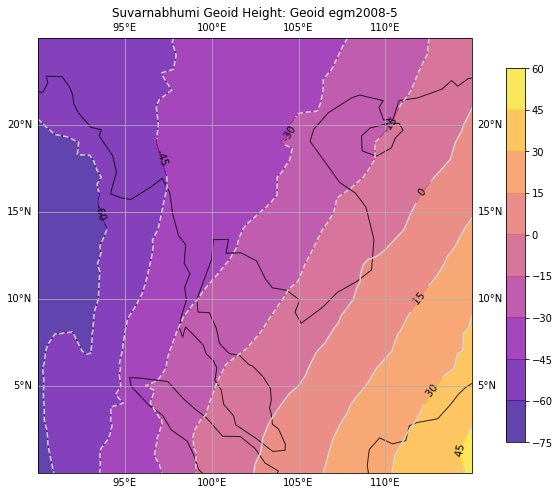

In [7]:
# Create a figure, make a map
# Then plot geoid on a small map

fig = plt.figure(figsize=(12, 8))

projn_lonlat = ccrs.PlateCarree()
ax = fig.add_subplot(1, 1, 1, projection=projn_lonlat)
#ax.set_global()
ax.set_extent( [90, 115, 0, 25], crs=projn_lonlat )

ax.coastlines("110m", alpha=0.8)

# Prep data
lats, lons, zs = latlonh[:,0], latlonh[:,1], latlonh[:,2]

# Add colourful filled contours.
filled_c = ax.tricontourf(lons, lats, zs, transform=ccrs.PlateCarree(), cmap=cm.plasma, alpha=0.75)

# And black line contours.
line_c = ax.tricontour(
    lons, lats, zs, levels=filled_c.levels, colors=["lightgray"], transform=ccrs.PlateCarree()
)

# Uncomment to make the line contours invisible.
plt.setp(line_c.collections, visible=True)

# Add a colorbar for the filled contour.
fig.colorbar(filled_c, orientation="vertical", shrink=0.86)

# Use the line contours to place contour labels.
ax.clabel(
    line_c,  # Typically best results when labelling line contours.
    colors=["black"],
    manual=False,  # Automatic placement vs manual placement.
    inline=True,  # Cut the line where the label will be placed.
    fmt=" {:.0f} ".format,  # Labes as integers, with some extra space.
)

ax.gridlines(crs=projn_lonlat, draw_labels=True, lw=1.2, edgecolor="darkblue", zorder=12)
ax.set_title("Suvarnabhumi Geoid Height: Geoid egm2008-5")
plt.show()

EOF